In [162]:
# Will use Hamiltonian MC to sample from multivariate normal

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time
import timeit

import scipy.stats 
import pandas as pd
import pymc3 as pm

import re
import numpy as np

In [163]:
mu=np.array([1,2,3]) ## center
sig=np.array([[4.,1.2,1.2],[1.2,4.,1.2],[1.2,1.2,4.]]) ## covariance matrix
detsig=np.linalg.det(sig) ## compute the determinant
print detsig

50.176


In [164]:
# Set up of Leap Frog
delta = 0.3
nSamples = 10000
L = 100

In [165]:
# Define potential energy function
U = lambda x: np.dot(np.dot((x-mu).T,np.linalg.inv(sig)),(x-mu))

# Define gradient of potential energy
dU = lambda x: np.dot(x.T,np.linalg.inv(sig))

# Define kinetic energy function
K = lambda p: sum(p.T*p)/2.0

In [166]:
# Set initial states
x0 = np.array([4.,4.,4.,])
x = np.zeros((3,nSamples))
x[:,0] = x0

In [167]:
# Implement Leap Frog
t = 1

while (t < nSamples-1):
    t = t + 1
    
    # Sample random momentum
    p0 = np.random.randn(3)
    
    ## Simulate Hamiltonian Dynamics
    # First 1/2 step of momentum
    pStar = p0 - (delta/2)*np.transpose(dU(x[:,t-1]))
    
    # First full step for position/sample
    xStar = x[:,t-1] + delta*pStar
    
    # Full steps
    for i in np.arange(L):
        pStar = pStar - delta*np.transpose(dU(xStar))
        xStar = xStar + delta*pStar
        
    # Last half step
    pStar = pStar - (delta/2)*np.transpose(dU(xStar))
    
    # Calculate energies at start and end of trejectory
    U0 = U(x[:,t-1])
    UStar = U(xStar)
    K0 = K(p0)
    KStar = K(pStar)
    
    # Acceptance/rejection
    alpha = np.minimum(1.0,np.exp((U0 + K0) - (UStar + KStar)))
    u = np.random.uniform(0,1,1)
    if (u < alpha):
        x[:,t] = xStar
    else:
        x[:,t] = x[:,t-1]

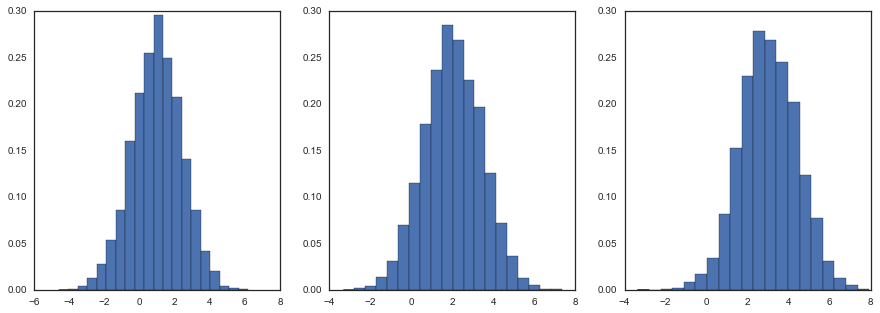

In [169]:
plt.subplots(1,3,figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(x[0],normed=True,bins=20)


plt.subplot(1,3,2)
plt.hist(x[1],normed=True,bins=20)


plt.subplot(1,3,3)
plt.hist(x[2],normed=True,bins=20)

plt.show()

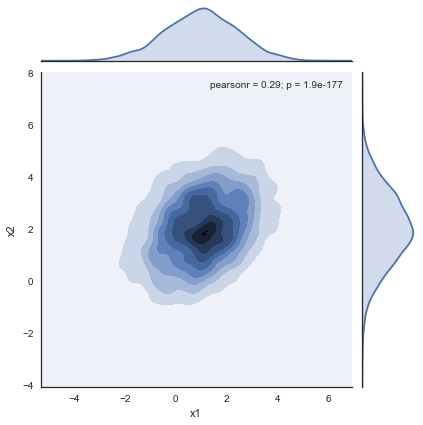

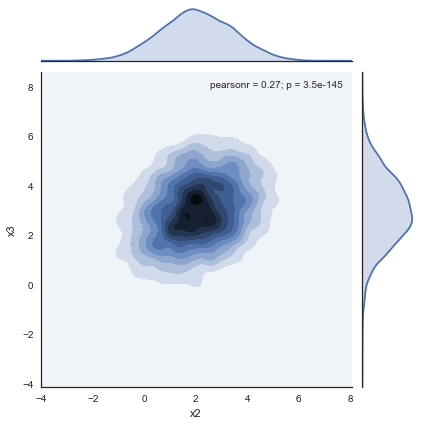

In [172]:
df = pd.DataFrame(x.T,columns=["x1","x2","x3"])

#plt.subplots(1,3,figsize=(15,5))

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

#plt.subplot(1,3,1)
#sns.kdeplot(x[0], x[1], cmap=cmap, n_levels=30, shade=True)
g = sns.jointplot(x="x1", y="x2", data=df, kind="kde")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g = sns.jointplot(x="x2", y="x3", data=df, kind="kde")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

#plt.subplot(1,3,2)
#sns.kdeplot(x[0], x[2], cmap=cmap, n_levels=30, shade=True)

#plt.subplot(1,3,3)
#sns.kdeplot(x[1], x[2], cmap=cmap, n_levels=30, shade=True)

plt.show()